# Superstore Sales Dashboard

### Summary
Before building a sales dashboard in Tableau, we should explore and clean the dataset. We began this process by examining the data type of each field, removing unnessary fields, and checking for null values. The 'Postal Code' field was the only field with null values. This was fairly easy to fix as we decided to fill the null values with a Burlington, VT zip code. Next, we looked for duplicates in the dataset. There was only one duplicate and it was for a chair order. It's reasonable to think this customer ordered two chairs in the same order so we concluded there were no erroneous duplicates. Then, we looked to clean up the 'Postal Code' and 'Sales' fields. The 'Postal Code' field was corrected to be a string with only 5 digits rather than having decimals, while the 'Sales' field was cleaned up to only have two decimals. Once we cleaned up the format of the 'Sales' field, we decided to take a closer look to ensure there were not any obvious errors. We plotted the sales by order date to confirm we weren't missing any time periods within the dataset. Next, we examined the dates with sales over $15,000 to confirm the high sales were correct. The days with high sales appeared reasonable as sales of expensive technology occured on these dates. Then, we pulled the unique values of the categorical fields we may use in our dashboard to confirm the format of the categories was consistent and clean. Lastly, we exported the dataframe into an Excel file that we can pull into Tableau to build our sales dashboard.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data/superstore-sales.csv', index_col='Order Date', parse_dates=['Order Date', 'Ship Date'], dayfirst=True)

In [3]:
df.head()

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-11-08,1,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-11-08,2,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-06-12,3,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-10-11,4,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-10-11,5,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
# Do not need Row ID
df.drop('Row ID', axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2017-11-08 to 2016-01-12
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   object        
 3   Customer ID    9800 non-null   object        
 4   Customer Name  9800 non-null   object        
 5   Segment        9800 non-null   object        
 6   Country        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9789 non-null   float64       
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sal

In [6]:
# Find null values in "Postal Code"
df[df["Postal Code"].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2018-12-05,CA-2018-104066,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


In [7]:
# Confirm all Burlington, Vermont postal codes are null
df.loc[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2018-12-05,CA-2018-104066,2018-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


In [8]:
# Replace null 'Postal Code' in Burlington, Vermont with a Burlington, VT Postal Code
df["Postal Code"].fillna("05401", inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9800 entries, 2017-11-08 to 2016-01-12
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9800 non-null   object        
 1   Ship Date      9800 non-null   datetime64[ns]
 2   Ship Mode      9800 non-null   object        
 3   Customer ID    9800 non-null   object        
 4   Customer Name  9800 non-null   object        
 5   Segment        9800 non-null   object        
 6   Country        9800 non-null   object        
 7   City           9800 non-null   object        
 8   State          9800 non-null   object        
 9   Postal Code    9800 non-null   object        
 10  Region         9800 non-null   object        
 11  Product ID     9800 non-null   object        
 12  Category       9800 non-null   object        
 13  Sub-Category   9800 non-null   object        
 14  Product Name   9800 non-null   object        
 15  Sal

In [10]:
df.index.inferred_type == "datetime64"

True

In [11]:
df.describe()

,Sales
count,9800.000000
mean,230.769059
std,626.651875
min,0.444000
25%,17.248000
50%,54.490000
75%,210.605000
max,22638.480000


In [12]:
# Check for duplicate values
df.loc[df.duplicated(), :]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2015-04-23,US-2015-150119,2015-04-27,Standard Class,LB-16795,Laurel Beltran,Home Office,United States,Columbus,Ohio,43229.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372


Since there is only 1 duplicate and it's for chairs, we are going to leave it in the dataset. It's reasonable to think someone ordered multiple chairs. Overall, it appears there are no erroneous duplicates in the dataset.

In [13]:
# Remove decimals from "Postal Code" column so its only 5 digits
df = df.astype({'Postal Code':'string'})

In [14]:
clean_postal = df['Postal Code']

In [15]:
PostalCode = []
for p in clean_postal:
    PostalCode.append(p[:5])

In [16]:
PostalCode[:5]

['42420', '42420', '90036', '33311', '33311']

In [17]:
df.drop(['Postal Code'], axis=1, inplace=True)

In [18]:
df.insert(loc=9, column='Postal Code', value=PostalCode)

In [19]:
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2017-11-08,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-11-08,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-06-12,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-10-11,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-10-11,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [20]:
# Round sales column to two decimals
df['Sales'] = df['Sales'].round(decimals=2)

In [21]:
df.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2017-11-08,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
2017-11-08,CA-2017-152156,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2017-06-12,CA-2017-138688,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
2016-10-11,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
2016-10-11,US-2016-108966,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.37


In [22]:
# Explore the sales data to see if there appears to be any missing dates or input errors
sales = df.groupby(df.index)['Sales'].sum().reset_index()

<AxesSubplot: xlabel='Order Date'>

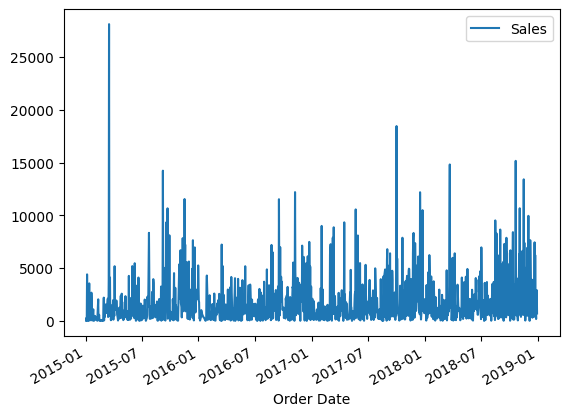

In [23]:
sales.plot(x='Order Date', y='Sales')

In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1230 non-null   datetime64[ns]
 1   Sales       1230 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.3 KB


In [25]:
from datetime import datetime 

mindate = sales['Order Date'].min()
maxdate = sales['Order Date'].max()
min = sales['Sales'].min()
max = sales['Sales'].max()
range = max-min

print("The sales data shows sales from {} to {}. The amount sales in a day ranges from ${:,.2f} to ${:,.2f}. There are no order dates without sales.".format(mindate.strftime("%B %-d, %Y"), maxdate.strftime("%B %-d, %Y"), min, max))

The sales data shows sales from January 3, 2015 to December 30, 2018. The amount sales in a day ranges from $2.02 to $28,106.73. There are no order dates without sales.


{'whiskers': [<matplotlib.lines.Line2D at 0x14678c100>,
 'caps': [<matplotlib.lines.Line2D at 0x14678c640>,
 'boxes': [<matplotlib.lines.Line2D at 0x14675be20>],
 'medians': [<matplotlib.lines.Line2D at 0x14678cb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x14678ce20>],
 'means': []}

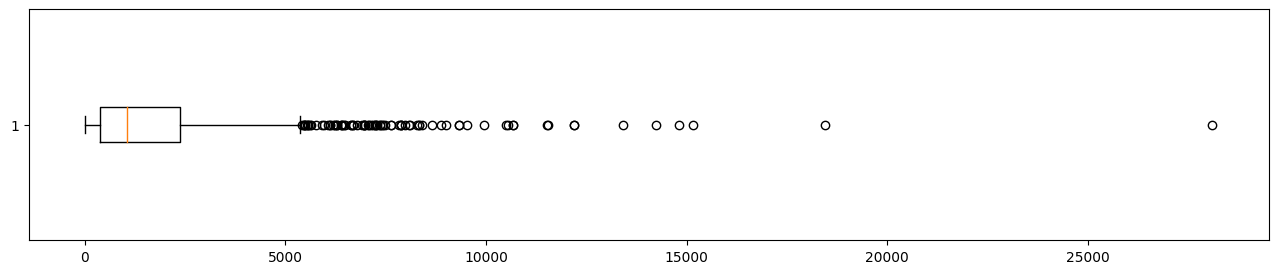

In [26]:
# Check sales data to see if any outliers may be errors
fig, ax = plt.subplots(figsize=(16, 3))
plt.boxplot(sales['Sales'], vert=False)

In [27]:
# Check order dates that have sales over $15,000
high_sales = sales.loc[sales['Sales'] > 15000].sort_values('Sales', ascending=False)
high_sales

,Order Date,Sales
53,2015-03-18,28106.73
825,2017-10-02,18452.97
1162,2018-10-22,15158.88


In [28]:
df.loc[['2015-03-18','2017-10-02','2018-10-22']].sort_values('Order Date')

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2015-03-18,CA-2015-145317,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10003626,Technology,Machines,Hewlett-Packard Deskjet 6540 Color Inkjet Printer,821.30
2015-03-18,CA-2015-145317,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48
2015-03-18,CA-2015-145317,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,OFF-PA-10001804,Office Supplies,Paper,Xerox 195,21.38
2015-03-18,CA-2015-145317,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,OFF-AR-10003183,Office Supplies,Art,Avery Fluorescent Highlighter Four-Color Set,8.02
2015-03-18,CA-2015-145317,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,FUR-FU-10004270,Furniture,Furnishings,"Executive Impressions 13"" Clairmont Wall Clock",30.77
2015-03-18,CA-2015-145317,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.94
2015-03-18,CA-2015-145317,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,FUR-FU-10001986,Furniture,Furnishings,"Dana Fluorescent Magnifying Lamp, White, 36""",122.35
2015-03-18,CA-2015-111871,2015-03-21,Second Class,EK-13795,Eileen Kiefer,Home Office,United States,San Francisco,California,94110,West,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,1198.33
2015-03-18,US-2015-131275,2015-03-24,Standard Class,SC-20050,Sample Company A,Home Office,United States,Burbank,California,91505,West,FUR-FU-10004597,Furniture,Furnishings,Eldon Cleatmat Chair Mats for Medium Pile Carpets,111.00


The the order dates with the 3 highest sales all appear to be accurate. The high sales is associated with technology purchases on these dates.

In [29]:
# See unique values of fields that may be used in dashboard. Confirm none should be cleaned up.
region = df['Region'].unique()
segment = df['Segment'].unique()
category = df['Category'].unique()
subcategory = df['Sub-Category'].unique()
ship_mode = df['Ship Mode'].unique()

print(region)
print(segment)
print(category)
print(subcategory)
print(ship_mode)

['South' 'West' 'Central' 'East']
['Consumer' 'Corporate' 'Home Office']
['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [31]:
# After exploring and cleaning the data set, it is ready to be exported into Tableau to build a sales dashboard
df.to_excel('Superstore Sales Dashboard.xlsx')